In [33]:
# 한글폰트 맥 버전

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 1) 사용하고 싶은 폰트 파일 경로 지정
# mac 예시: Apple SD Gothic Neo
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"

# 2) matplotlib에 등록할 이름 얻기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 3) 전역 설정
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 이후부터 그리는 모든 matplotlib/seaborn 그래프에 한글 적용됨

In [ ]:
# 한글폰트 윈도우 버전 
import matplotlib.pyplot as plt

# Windows 예시: 맑은 고딕
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


In [27]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. 데이터 로드
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

# 2. 분석 대상 컬럼 선택 (genre_ 및 tag_ 만)
target_cols = [col for col in df.columns 
               if (col.startswith('genre_') or col.startswith('tag_')) 
               and col not in ['tag_list', 'studios_list']]
subset_df = df[target_cols]

# 3. 전체 상관계수 계산
corr_matrix = subset_df.corr()

# (1) 대각선(자기 자신과의 관계, 항상 1.0)은 필터링 기준에서 제외하기 위해 0으로 변경
temp_corr = corr_matrix.copy()
np.fill_diagonal(temp_corr.values, 0)

# (2) 각 컬럼별로 "다른 컬럼과의 최대 상관계수"가 0.3 이상인지 확인
#     (절대값을 사용하지 않으면 양의 상관관계만 봅니다. 여기서는 0.3 이상인 '양의 관계'만 봅니다)
threshold = 0.4
relevant_cols = temp_corr.columns[(temp_corr >= threshold).any()]

# (3) 필터링된 컬럼들로만 다시 상관행렬 구성
filtered_corr_matrix = corr_matrix.loc[relevant_cols, relevant_cols]

print(f"전체 {len(corr_matrix)}개 컬럼 중, 0.3 이상의 관계가 있는 {len(filtered_corr_matrix)}개 컬럼만 남았습니다.")

# 4. Plotly로 인터랙티브 히트맵 그리기
if len(filtered_corr_matrix) > 0:
    fig = px.imshow(
        filtered_corr_matrix,
        labels=dict(x="Tag/Genre 1", y="Tag/Genre 2", color="Correlation"),
        x=filtered_corr_matrix.columns,
        y=filtered_corr_matrix.columns,
        color_continuous_scale='RdBu_r', # 빨강~파랑
        zmin=-1, 
        zmax=1,
        title=f"Filtered Correlation Heatmap (상관계수 >= {threshold})"
    )

    fig.update_layout(
        width=900,  
        height=900, # 컬럼이 줄어들었으므로 크기를 조금 조정해도 됩니다
        autosize=False
    )

    fig.show()
else:
    print("조건(0.3 이상)을 만족하는 상관관계가 하나도 없습니다.")


전체 218개 컬럼 중, 0.3 이상의 관계가 있는 23개 컬럼만 남았습니다.


In [29]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. 데이터 로드
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

# 2. 분석 대상 컬럼 선택 (genre_ 및 tag_ 만)
target_cols = [col for col in df.columns 
               if (col.startswith('genre_') or col.startswith('tag_')) 
               and col not in ['tag_list', 'studios_list']]
subset_df = df[target_cols]

# 3. 전체 상관계수 계산
corr_matrix = subset_df.corr()

# 4. 대각선 제거 후 threshold 이상 있는 컬럼만 선택
temp_corr = corr_matrix.copy()
np.fill_diagonal(temp_corr.values, 0)

threshold = 0.4   # ★ 0.35 → 0.4 로 변경
relevant_cols = temp_corr.columns[(temp_corr >= threshold).any()]
filtered_corr_matrix = corr_matrix.loc[relevant_cols, relevant_cols]

print(f"전체 {len(corr_matrix)}개 컬럼 중, {threshold} 이상의 관계가 있는 "
      f"{len(filtered_corr_matrix)}개 컬럼만 남았습니다.")

# 5. 각 컬럼별 최대 상관계수 계산 (자기 자신 제외)
col_scores = filtered_corr_matrix.copy()
np.fill_diagonal(col_scores.values, 0)
max_corr_per_col = col_scores.max(axis=1)

# 6. 최대 상관계수를 기준으로 컬럼 정렬 (내림차순)
sorted_cols = max_corr_per_col.sort_values(ascending=False).index

# 7-1. 상위 23개 히트맵 (또는 남은 전체 개수 사용)
top_n_all = min(23, len(sorted_cols))   # 안전하게 남은 개수보다 크지 않게
top_all_cols = sorted_cols[:top_n_all]
top_all_corr = filtered_corr_matrix.loc[top_all_cols, top_all_cols]

fig1 = px.imshow(
    top_all_corr,
    labels=dict(x="Tag/Genre", y="Tag/Genre", color="Correlation"),
    x=top_all_corr.columns,
    y=top_all_corr.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1,
    zmax=1,
    title=f"상관계수 상위 {top_n_all}개 (상관계수 >= {threshold})"
)
fig1.update_layout(width=900, height=900, autosize=False)
fig1.show()

# 7-2. 상위 10개 히트맵
top_n_10 = min(10, len(sorted_cols))
top_10_cols = sorted_cols[:top_n_10]
top10_corr = filtered_corr_matrix.loc[top_10_cols, top_10_cols]

fig2 = px.imshow(
    top10_corr,
    labels=dict(x="Tag/Genre", y="Tag/Genre", color="Correlation"),
    x=top10_corr.columns,
    y=top10_corr.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1,
    zmax=1,
    title=f"상관계수 상위{top_n_10}개 (상관계수 >= {threshold})"
)
fig2.update_layout(width=700, height=700, autosize=False)
fig2.show()


전체 218개 컬럼 중, 0.4 이상의 관계가 있는 23개 컬럼만 남았습니다.


In [12]:
import pandas as pd
import numpy as np

# top10_corr: 상위 10개 컬럼만 추린 상관계수 행렬이라고 가정

# 1. 자기 자신(1.0) 제외한 상관계수 행렬 만들기
top10_no_diag = top10_corr.copy()
np.fill_diagonal(top10_no_diag.values, np.nan)

# 2. 각 컬럼별 “가장 강한 상관 파트너”와 그 값 구하기
best_partner = top10_no_diag.idxmax(axis=1)        # 가장 상관 높은 상대 이름
best_corr = top10_no_diag.max(axis=1)              # 그때의 상관계수

summary_df = pd.DataFrame({
    'Feature': top10_no_diag.index,
    'Best_partner': best_partner,
    'Best_corr': best_corr.round(3)
}).sort_values('Best_corr', ascending=False)

print("\n[상위 10개 내에서 각 항목별 최대 상관 파트너 요약]\n")
display(summary_df)

# 3. 상관계수 풀 테이블(10x10)을 텍스트 표로 보고 싶을 때
print("\n[상위 10개 Feature 간 상관계수 테이블]\n")
display(top10_corr.round(3))



[상위 10개 내에서 각 항목별 최대 상관 파트너 요약]



,Feature,Best_partner,Best_corr
genre_Mecha,genre_Mecha,tag_Real Robot,0.560
tag_Real Robot,tag_Real Robot,genre_Mecha,0.560
genre_Music,genre_Music,tag_Idol,0.534
tag_Idol,tag_Idol,genre_Music,0.534
tag_Super Robot,tag_Super Robot,genre_Mecha,0.507
genre_Romance,genre_Romance,tag_Heterosexual,0.491
tag_Heterosexual,tag_Heterosexual,genre_Romance,0.491
tag_Primarily Female Cast,tag_Primarily Female Cast,tag_Cute Girls Doing Cute Things,0.490
tag_Cute Girls Doing Cute Things,tag_Cute Girls Doing Cute Things,tag_Primarily Female Cast,0.490
tag_Henshin,tag_Henshin,tag_Primarily Female Cast,0.168



[상위 10개 Feature 간 상관계수 테이블]



,genre_Mecha,tag_Real Robot,genre_Music,tag_Idol,tag_Super Robot,genre_Romance,tag_Heterosexual,tag_Primarily Female Cast,tag_Cute Girls Doing Cute Things,tag_Henshin
genre_Mecha,1.000,0.560,-0.023,-0.001,0.507,-0.071,-0.019,-0.051,-0.073,0.002
tag_Real Robot,0.560,1.000,0.007,0.018,0.232,-0.045,0.023,-0.031,-0.045,-0.012
genre_Music,-0.023,0.007,1.000,0.534,-0.037,-0.030,-0.054,0.156,0.147,0.055
tag_Idol,-0.001,0.018,0.534,1.000,-0.004,-0.034,-0.024,0.193,0.176,0.117
tag_Super Robot,0.507,0.232,-0.037,-0.004,1.000,-0.048,0.006,-0.014,-0.027,0.069
genre_Romance,-0.071,-0.045,-0.030,-0.034,-0.048,1.000,0.491,0.014,-0.103,-0.026
tag_Heterosexual,-0.019,0.023,-0.054,-0.024,0.006,0.491,1.000,0.012,-0.074,0.001
tag_Primarily Female Cast,-0.051,-0.031,0.156,0.193,-0.014,0.014,0.012,1.000,0.490,0.168
tag_Cute Girls Doing Cute Things,-0.073,-0.045,0.147,0.176,-0.027,-0.103,-0.074,0.490,1.000,0.122
tag_Henshin,0.002,-0.012,0.055,0.117,0.069,-0.026,0.001,0.168,0.122,1.000


/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_12937/1749487015.py:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




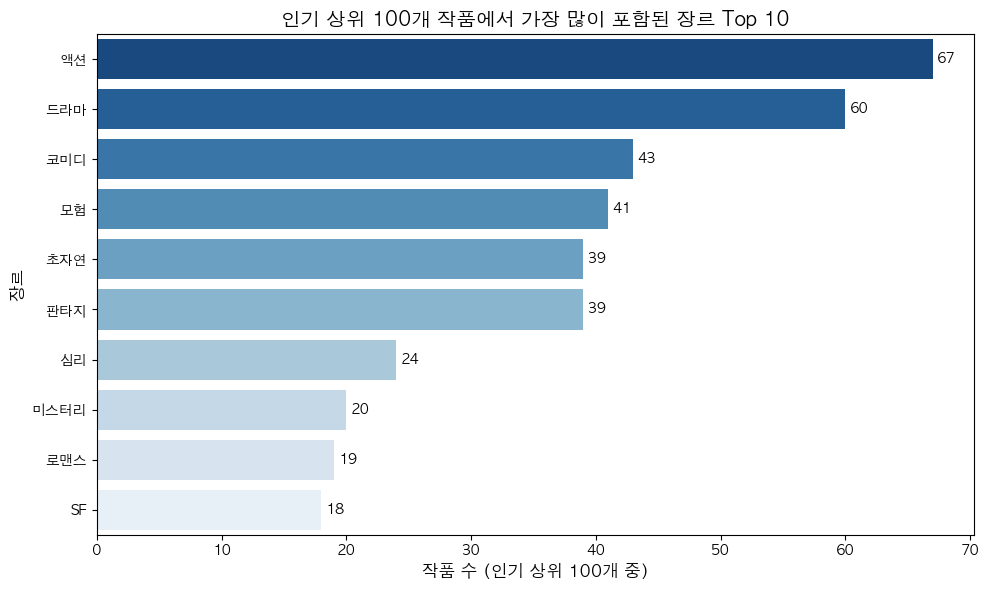

/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_12937/1749487015.py:78: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




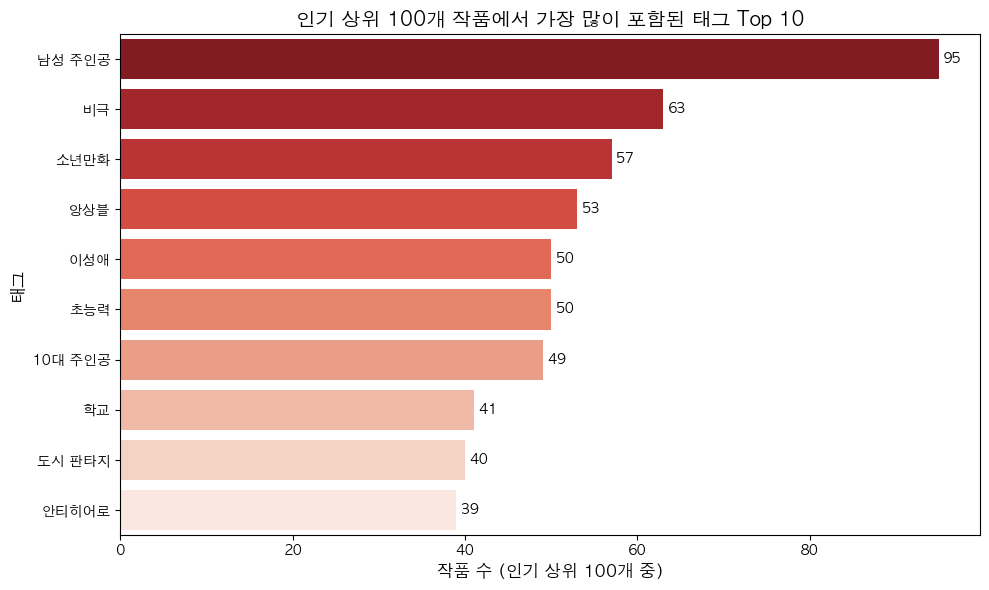

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 한글 폰트 설정 ==========
plt.rcParams['font.family'] = 'AppleGothic'  # Mac: AppleGothic, Windows: Malgun Gothic
plt.rcParams['axes.unicode_minus'] = False

# ========== 장르/태그 한글 번역 딕셔너리 ==========
genre_kr = {
    'genre_Action': '액션', 'genre_Drama': '드라마', 'genre_Comedy': '코미디',
    'genre_Adventure': '모험', 'genre_Fantasy': '판타지', 'genre_Supernatural': '초자연',
    'genre_Psychological': '심리', 'genre_Mystery': '미스터리', 'genre_Romance': '로맨스',
    'genre_Sci-Fi': 'SF', 'genre_Horror': '호러', 'genre_Thriller': '스릴러',
    'genre_Sports': '스포츠', 'genre_Slice of Life': '일상', 'genre_Mecha': '메카',
    'genre_Music': '음악', 'genre_Ecchi': '에치', 'genre_Mahou Shoujo': '마법소녀'
}

tag_kr = {
    'tag_Male Protagonist': '남성 주인공', 'tag_Tragedy': '비극', 'tag_Shounen': '소년만화',
    'tag_Ensemble Cast': '앙상블', 'tag_Heterosexual': '이성애', 'tag_Super Power': '초능력',
    'tag_Primarily Teen Cast': '10대 주인공', 'tag_School': '학교', 
    'tag_Urban Fantasy': '도시 판타지', 'tag_Anti-Hero': '안티히어로'
}

# ========== 데이터 로드 및 처리 ==========
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

top100 = df.sort_values('popularity', ascending=False).head(100)
genre_cols = [c for c in df.columns if c.startswith('genre_')]
tag_cols   = [c for c in df.columns if c.startswith('tag_') and c not in ['tag_list']]

genre_counts = top100[genre_cols].sum().sort_values(ascending=False)
tag_counts   = top100[tag_cols].sum().sort_values(ascending=False)

genre_top10 = genre_counts.head(10)
tag_top10   = tag_counts.head(10)

# ========== DataFrame으로 변환 (시각화용) ==========
genre_top10_df = pd.DataFrame({
    'feature': genre_top10.index,
    'count': genre_top10.values
})
genre_top10_df['feature_kr'] = genre_top10_df['feature'].map(genre_kr).fillna(
    genre_top10_df['feature'].str.replace('genre_', '')
)

tag_top10_df = pd.DataFrame({
    'feature': tag_top10.index,
    'count': tag_top10.values
})
tag_top10_df['feature_kr'] = tag_top10_df['feature'].map(tag_kr).fillna(
    tag_top10_df['feature'].str.replace('tag_', '')
)

# ========== 시각화 1: 장르 Top10 ==========
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=genre_top10_df,
    x='count',
    y='feature_kr',
    palette='Blues_r'
)

# 막대 끝에 횟수 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10)

plt.xlabel('작품 수 (인기 상위 100개 중)', fontsize=12)
plt.ylabel('장르', fontsize=12)
plt.title('인기 상위 100개 작품에서 가장 많이 포함된 장르 Top 10', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ========== 시각화 2: 태그 Top10 ==========
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=tag_top10_df,
    x='count',
    y='feature_kr',
    palette='Reds_r'
)

# 막대 끝에 횟수 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10)

plt.xlabel('작품 수 (인기 상위 100개 중)', fontsize=12)
plt.ylabel('태그', fontsize=12)
plt.title('인기 상위 100개 작품에서 가장 많이 포함된 태그 Top 10', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_17879/4189779721.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pair_top20, y='pair_name', x='pair_score', palette='rocket')


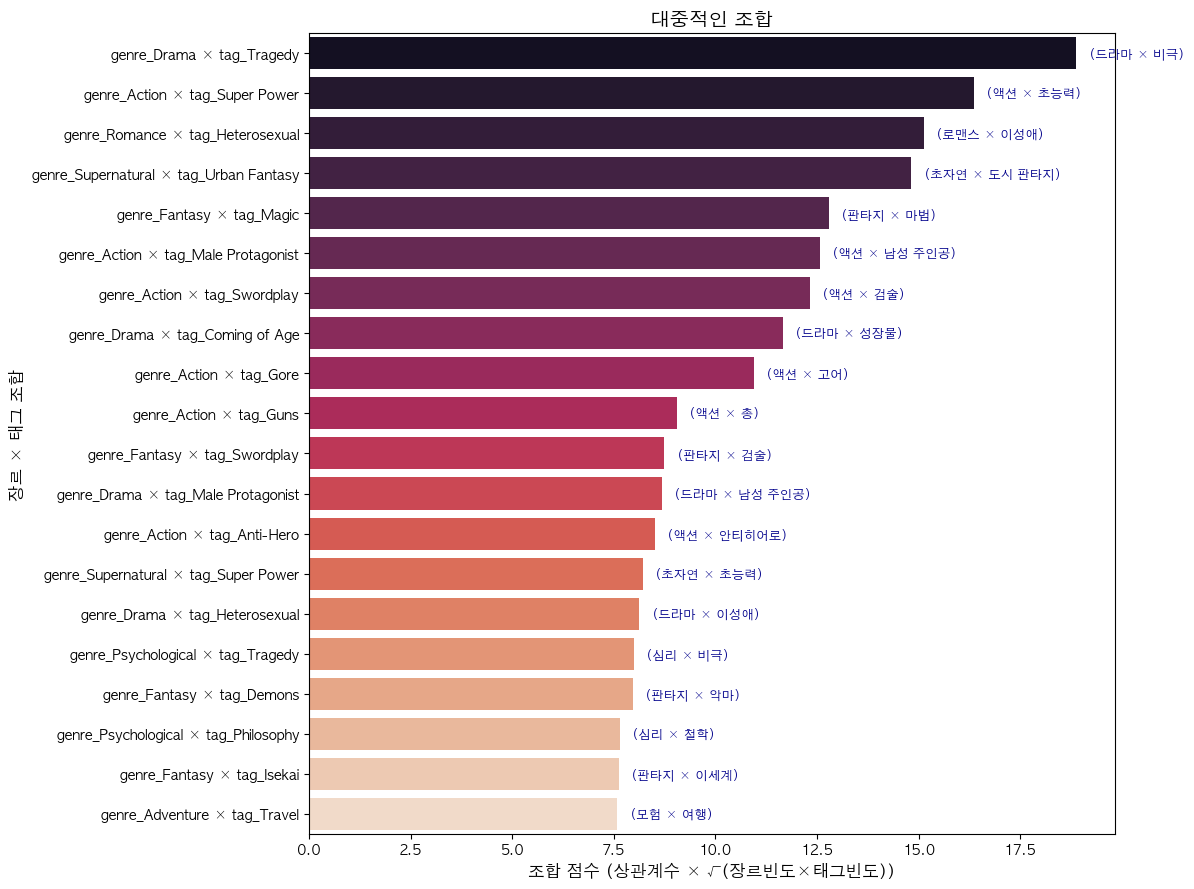

/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_17879/4189779721.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=delta_top20, y='pair_name', x='delta_corr', palette='viridis')


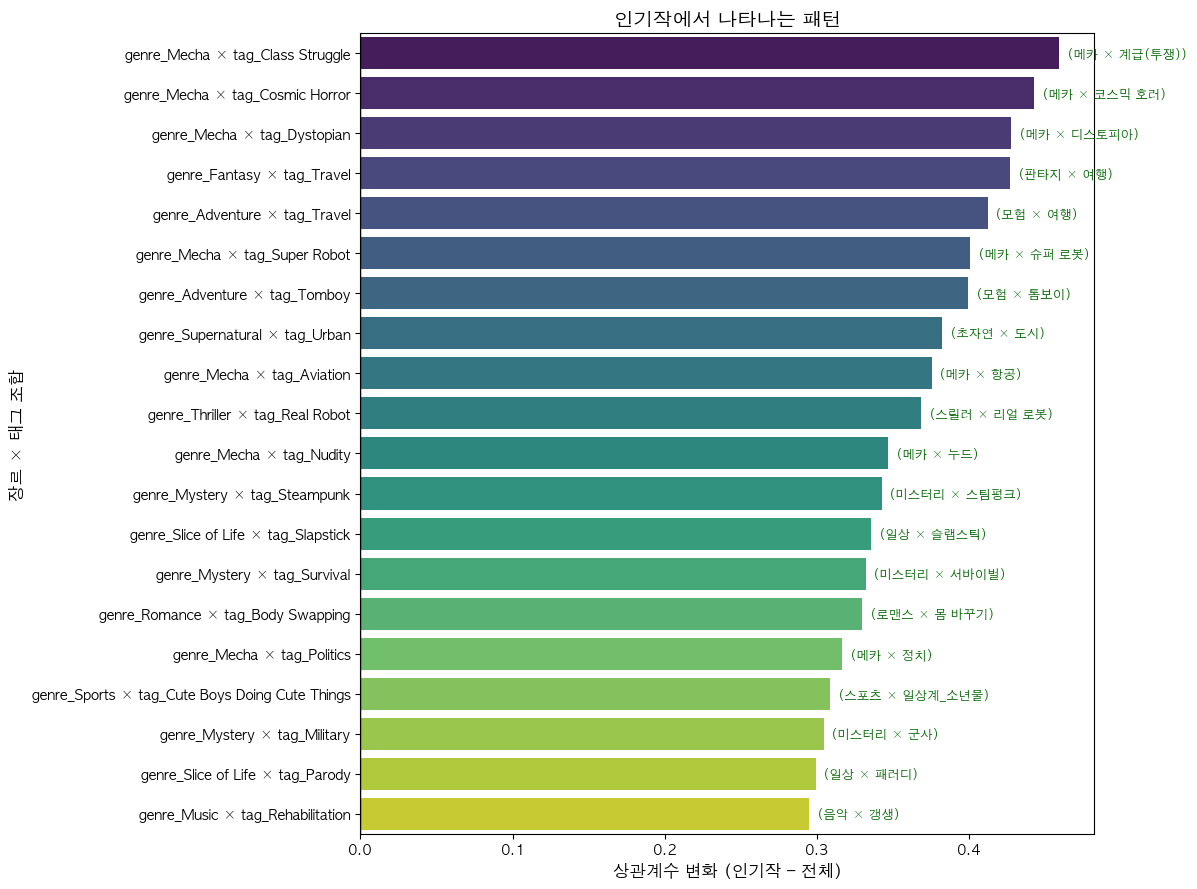

/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_17879/4189779721.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=genre_score_top15, y='feature_kr', x='score', palette='Blues_r')


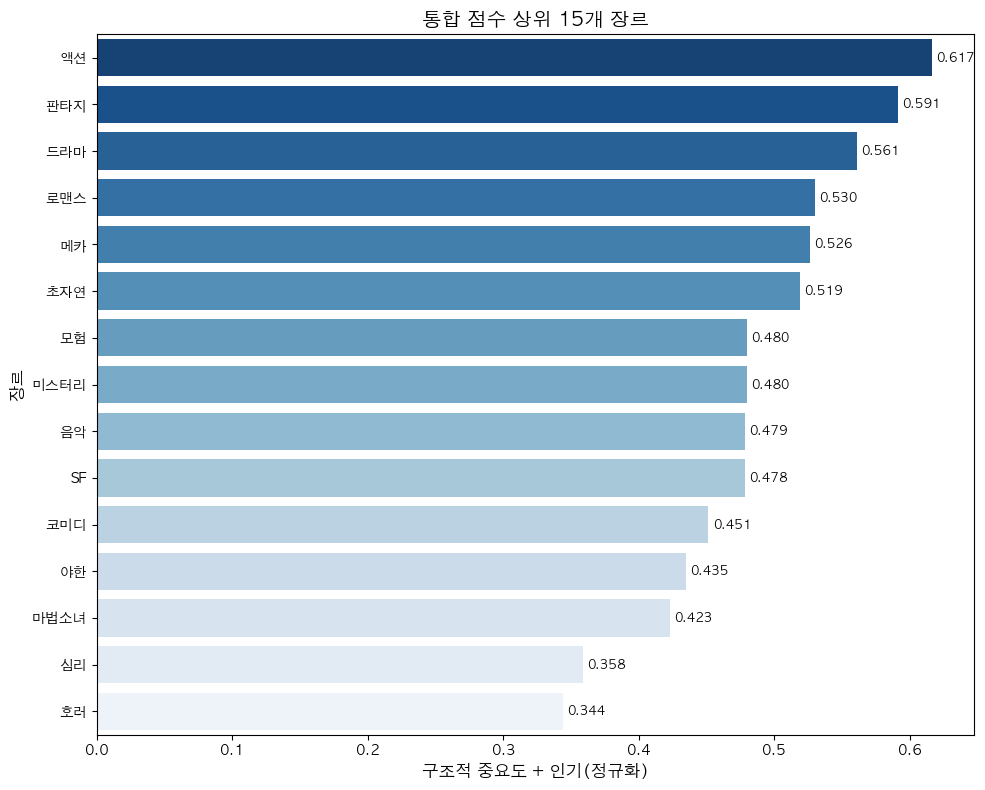

/var/folders/s6/m9psywlj2b73t0sj1kpdvzmh0000gn/T/ipykernel_17879/4189779721.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tag_score_top15, y='feature_kr', x='score', palette='Reds_r')


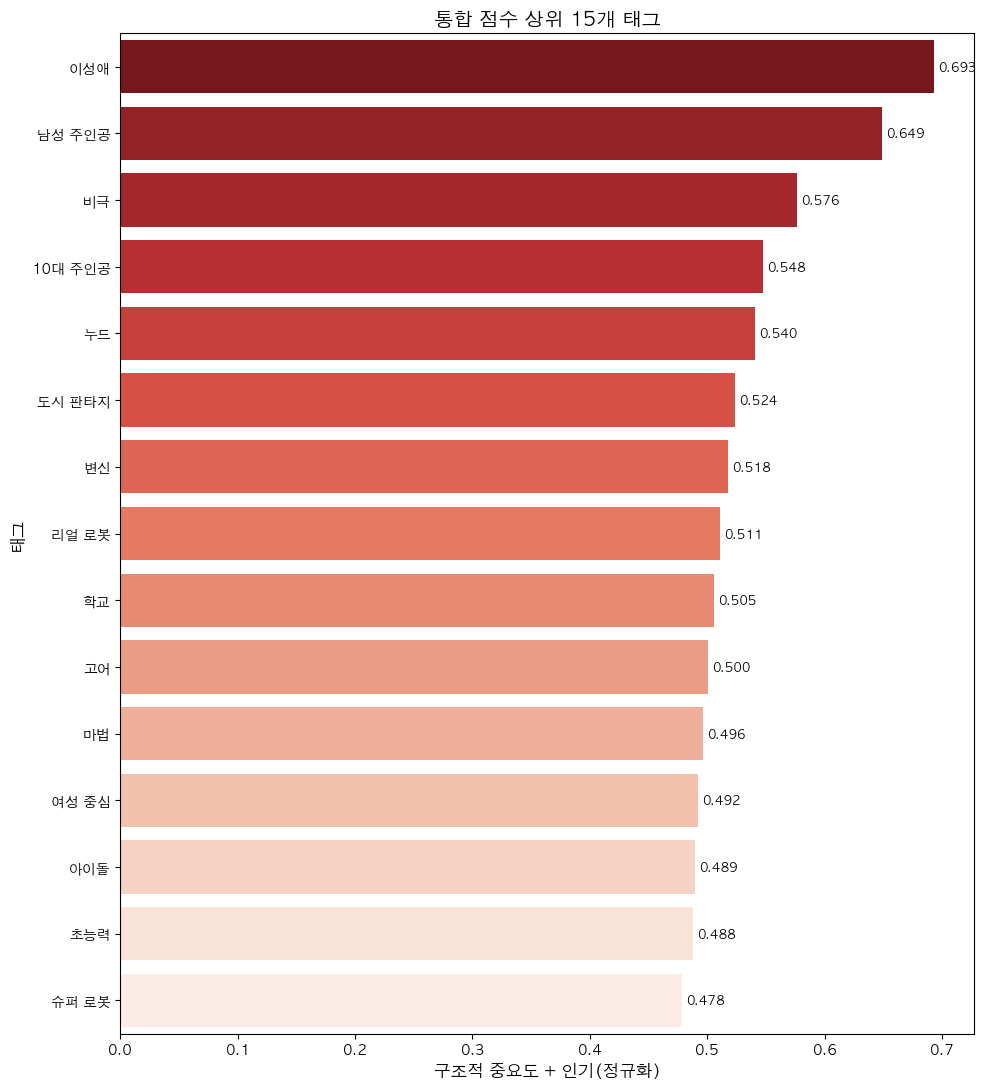

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 한글 폰트 설정 ==========
plt.rcParams['font.family'] = 'AppleGothic'  # Mac: AppleGothic, Windows: Malgun Gothic
plt.rcParams['axes.unicode_minus'] = False

# ========== 장르/태그 한글 번역 딕셔너리 ==========
genre_kr = {
    'genre_Action': '액션', 'genre_Drama': '드라마', 'genre_Comedy': '코미디',
    'genre_Adventure': '모험', 'genre_Fantasy': '판타지', 'genre_Supernatural': '초자연',
    'genre_Psychological': '심리', 'genre_Mystery': '미스터리', 'genre_Romance': '로맨스',
    'genre_Sci-Fi': 'SF', 'genre_Horror': '호러', 'genre_Thriller': '스릴러',
    'genre_Sports': '스포츠', 'genre_Slice of Life': '일상', 'genre_Mecha': '메카',
    'genre_Music': '음악', 'genre_Ecchi': '야한', 'genre_Mahou Shoujo': '마법소녀'
}

tag_kr = {
    'tag_Male Protagonist': '남성 주인공', 'tag_Tragedy': '비극', 'tag_Shounen': '소년만화',
    'tag_Ensemble Cast': '앙상블', 'tag_Heterosexual': '이성애', 'tag_Super Power': '초능력',
    'tag_Primarily Teen Cast': '10대 주인공', 'tag_School': '학교', 'tag_Urban Fantasy': '도시 판타지',
    'tag_Anti-Hero': '안티히어로', 'tag_Real Robot': '리얼 로봇', 'tag_Idol': '아이돌',
    'tag_Magic': '마법', 'tag_Isekai': '이세계', 'tag_Swordplay': '검술',
    'tag_Band': '밴드', 'tag_Cute Girls Doing Cute Things': '일상계_소녀물', 'tag_Super Robot': '슈퍼 로봇',
    'tag_Military': '군사', 'tag_Primarily Female Cast': '여성 중심', 'tag_Primarily Male Cast': '남성 중심',
    'tag_Coming of Age': '성장물', 'tag_Found Family': '대안가족', 'tag_Love Triangle': '삼각관계',
    'tag_Female Protagonist': '여성 주인공', 'tag_Dragons': '드래곤', 'tag_Demons': '악마',
    'tag_Gods': '신', 'tag_Time Manipulation': '시간 조작', 'tag_Survival': '서바이벌', 'tag_Guns': '총',
    'tag_Gore': '고어', 'tag_Philosophy': '철학', 'tag_Travel': '여행', 'tag_Class Struggle': '계급(투쟁)',
    'tag_Cosmic Horror': '코스믹 호러', 'tag_Dystopian': '디스토피아', 'tag_Tomboy': '톰보이', 
    'tag_Urban': '도시', 'tag_Aviation': '항공', 'tag_Nudity': '누드', 'tag_Steampunk': '스팀펑크', 
    'tag_Slapstick': '슬랩스틱', 'tag_Body Swapping': '몸 바꾸기', 'tag_Politics': '정치', 
    'tag_Cute Boys Doing Cute Things': '일상계_소년물', 'tag_Parody': '패러디', 'tag_Rehabilitation': '갱생',
    'tag_Henshin': '변신', 
}

feature_kr = {**genre_kr, **tag_kr}

def make_korean_caption(genre_eng, tag_eng):
    """genre_Drama × tag_Tragedy → (드라마 × 비극)"""
    g_kr = genre_kr.get(genre_eng, genre_eng.replace('genre_', ''))
    t_kr = tag_kr.get(tag_eng, tag_eng.replace('tag_', ''))
    return f"({g_kr} × {t_kr})"

# -------------------------------------------------------------------
# 0. 데이터 로드 및 기본 준비
# -------------------------------------------------------------------
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

genre_cols = [c for c in df.columns if c.startswith('genre_')]
tag_cols   = [c for c in df.columns if c.startswith('tag_') and c != 'tag_list']
subset_all = df[genre_cols + tag_cols]

# -------------------------------------------------------------------
# 1. 전체 상관계수 & 인기 Top100 상관계수 계산
# -------------------------------------------------------------------
corr_all = subset_all.corr()
top100 = df.sort_values('popularity', ascending=False).head(100)
subset_top = top100[genre_cols + tag_cols]
corr_top = subset_top.corr()
pop_genre_freq = top100[genre_cols].sum()
pop_tag_freq   = top100[tag_cols].sum()

# -------------------------------------------------------------------
# 2. 장르-태그 쌍 단위 데이터프레임 생성
# -------------------------------------------------------------------
rows = []
for g in genre_cols:
    for t in tag_cols:
        corr_all_val = corr_all.loc[g, t]
        corr_top_val = corr_top.loc[g, t]
        rows.append({
            'genre': g, 'tag': t,
            'corr_all': corr_all_val, 'corr_top': corr_top_val,
            'pop_genre': pop_genre_freq.get(g, 0),
            'pop_tag': pop_tag_freq.get(t, 0)
        })

pair_df = pd.DataFrame(rows)
pair_df = pair_df[(pair_df['corr_all'] > 0) & (pair_df['pop_genre'] > 0) & (pair_df['pop_tag'] > 0)]

# -------------------------------------------------------------------
# 3-1. 지표 1: PairScore
# -------------------------------------------------------------------
pair_df['pair_score'] = pair_df['corr_all'] * np.sqrt(pair_df['pop_genre'] * pair_df['pop_tag'])
pair_top20 = pair_df.sort_values('pair_score', ascending=False).head(20).copy()
pair_top20['pair_name'] = pair_top20['genre'] + ' × ' + pair_top20['tag']
pair_top20['caption_kr'] = pair_top20.apply(lambda r: make_korean_caption(r['genre'], r['tag']), axis=1)

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=pair_top20, y='pair_name', x='pair_score', palette='rocket')
for i, (idx, row) in enumerate(pair_top20.iterrows()):
    ax.text(row['pair_score'] + 0.3, i, row['caption_kr'], va='center', fontsize=9, color='darkblue', fontweight='bold')
plt.xlabel('조합 점수 (상관계수 × √(장르빈도×태그빈도))', fontsize=12)
plt.ylabel('장르 × 태그 조합', fontsize=12)
plt.title('대중적인 조합 TOP20', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3-2. 지표 2: Δ
# -------------------------------------------------------------------
pair_df['delta_corr'] = pair_df['corr_top'] - pair_df['corr_all']
delta_top20 = pair_df.sort_values('delta_corr', ascending=False).head(20).copy()
delta_top20['pair_name'] = delta_top20['genre'] + ' × ' + delta_top20['tag']
delta_top20['caption_kr'] = delta_top20.apply(lambda r: make_korean_caption(r['genre'], r['tag']), axis=1)

plt.figure(figsize=(12, 9))
ax = sns.barplot(data=delta_top20, y='pair_name', x='delta_corr', palette='viridis')
plt.axvline(0, color='black', linewidth=1)
for i, (idx, row) in enumerate(delta_top20.iterrows()):
    ax.text(row['delta_corr'] + 0.005, i, row['caption_kr'], va='center', fontsize=9, color='darkgreen', fontweight='bold')
plt.xlabel('상관계수 변화 (인기작 – 전체)', fontsize=12)
plt.ylabel('장르 × 태그 조합', fontsize=12)
plt.title('인기작에서 나타나는 패턴', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3-3. 지표 3: 장르/태그 단일 스코어
# -------------------------------------------------------------------
corr_no_diag = corr_all.copy()
np.fill_diagonal(corr_no_diag.values, 0)
centrality = corr_no_diag.abs().max(axis=1)
pop_freq = pd.concat([pop_genre_freq, pop_tag_freq])
pop_freq = pop_freq.reindex(centrality.index).fillna(0)

def min_max_norm(s):
    if s.max() == s.min():
        return s * 0
    return (s - s.min()) / (s.max() - s.min())

centrality_norm = min_max_norm(centrality)
pop_norm = min_max_norm(pop_freq)
alpha = 0.5
feature_score = alpha * centrality_norm + (1 - alpha) * pop_norm

score_df = pd.DataFrame({
    'feature': centrality.index,
    'centrality': centrality_norm,
    'popularity': pop_norm,
    'score': feature_score
})

genre_score_top15 = score_df[score_df['feature'].str.startswith('genre_')].sort_values('score', ascending=False).head(15)
tag_score_top15 = score_df[score_df['feature'].str.startswith('tag_')].sort_values('score', ascending=False).head(15)

genre_score_top15['feature_kr'] = genre_score_top15['feature'].map(feature_kr).fillna(genre_score_top15['feature'])
tag_score_top15['feature_kr'] = tag_score_top15['feature'].map(feature_kr).fillna(tag_score_top15['feature'])

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=genre_score_top15, y='feature_kr', x='score', palette='Blues_r')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)
plt.xlabel('구조적 중요도 + 인기(정규화)', fontsize=12)
plt.ylabel('장르', fontsize=12)
plt.title('통합 점수 상위 15개 장르', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 11))
ax = sns.barplot(data=tag_score_top15, y='feature_kr', x='score', palette='Reds_r')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)
plt.xlabel('구조적 중요도 + 인기(정규화)', fontsize=12)
plt.ylabel('태그', fontsize=12)
plt.title('통합 점수 상위 15개 태그', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
